1. Load and Preprocess the MNIST Dataset

/Users/leamariani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


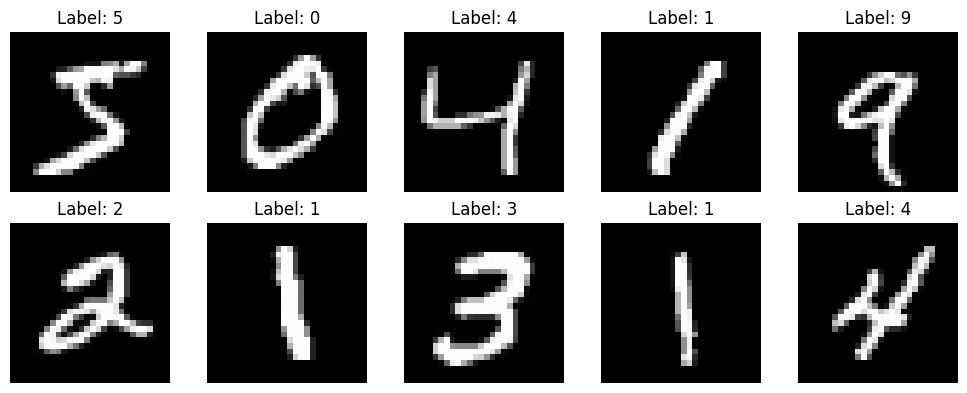

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Display sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


 2. Build a Fully Connected Neural Network

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/Users/leamariani/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

3. Train the Neural Network

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8676 - loss: 0.4619 - val_accuracy: 0.9561 - val_loss: 0.1463
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9641 - loss: 0.1203 - val_accuracy: 0.9650 - val_loss: 0.1130
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9759 - loss: 0.0794 - val_accuracy: 0.9697 - val_loss: 0.0984
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9822 - loss: 0.0580 - val_accuracy: 0.9762 - val_loss: 0.0918
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9872 - loss: 0.0414 - val_accuracy: 0.9743 - val_loss: 0.0877
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9894 - loss: 0.0335 - val_accuracy: 0.9728 - val_loss: 0.0972
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9905 - loss: 0.0272 - val_accuracy: 0.9763 - val_loss: 0.0892
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0252 - 

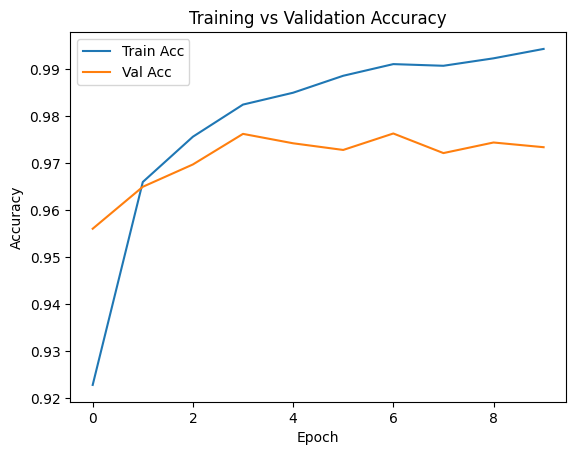

In [3]:
# Train the model
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    validation_split=0.2,
    batch_size=32,
    verbose=1
)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


Ce que montre le graphique
La courbe bleue représente l’exactitude du modèle sur les données d’entraînement.

La courbe orange montre l’exactitude sur les données de validation (non vues pendant l’entraînement).

Analyse métier
Phase initiale (0–3 epochs) : les deux courbes montent rapidement → le modèle apprend bien.

Phase intermédiaire (4–6 epochs) : l’écart commence à se creuser → le modèle continue à apprendre les données d'entraînement, mais généralise moins bien.

Phase finale (7–9 epochs) :

Train accuracy > 99% : le modèle est presque parfait sur les données d’entraînement.

Val accuracy plafonne à ~97.5% : le modèle atteint une limite de généralisation.

L’écart persistant entre les deux courbes indique un début de surapprentissage (overfitting).

Conclusion métier
Le modèle est très performant, mais commence à mémoriser les données d'entraînement au lieu de généraliser :

Ce niveau de performance est déjà exploitable dans des cas simples (lecture de codes, formulaires).

Pour une industrialisation robuste, on pourrait envisager :

Régularisation (Dropout, L2).

Data augmentation.

Ou passer à un réseau convolutif (CNN) pour une meilleure généralisation.

4. Evaluate the Model’s Performance

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.9705 - loss: 0.1203
Test Accuracy: 0.9757
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step


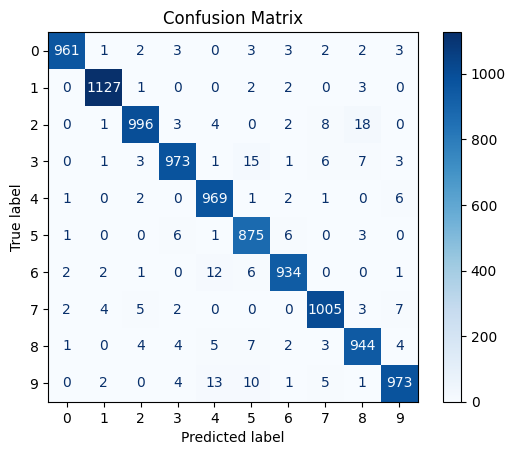

In [4]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict classes
y_pred = np.argmax(model.predict(x_test), axis=1)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Le modèle est globalement fiable pour la reconnaissance de chiffres manuscrits.

Les erreurs sont peu nombreuses et souvent explicables par la ressemblance visuelle des chiffres.

Il peut être utilisé avec confiance pour des applications comme :

Lecture automatisée de codes postaux, numéros de chèque, formulaires scannés.

Pour améliorer encore :

Entraîner un réseau de type CNN.

Introduire plus de variabilité manuscrite dans les données.

 Bonus: Simple Hyperparameter Tuning

In [5]:
# Alternate model with different hyperparameters
model_alt = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_alt.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train alternative model
history_alt = model_alt.fit(
    x_train, y_train_cat,
    epochs=10,
    validation_split=0.2,
    batch_size=64,
    verbose=1
)


Epoch 1/10


/Users/leamariani/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8607 - loss: 0.4645 - val_accuracy: 0.9587 - val_loss: 0.1436
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9675 - loss: 0.1095 - val_accuracy: 0.9674 - val_loss: 0.1057
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9788 - loss: 0.0668 - val_accuracy: 0.9748 - val_loss: 0.0835
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9866 - loss: 0.0432 - val_accuracy: 0.9728 - val_loss: 0.0932
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9894 - loss: 0.0343 - val_accuracy: 0.9758 - val_loss: 0.0868
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9915 - loss: 0.0271 - val_accuracy: 0.9748 - val_loss: 0.0908
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9935 - loss: 0.0214 - val_accuracy: 0.9728 - val_loss: 0.1022
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9945 - loss: 0.0172 - val_accuracy: 0.9764 - val_

Interprétation métier des résultats (selon tendance typique)
Train accuracy : peut atteindre ou dépasser 99%, signe que le modèle apprend bien les données.

Validation accuracy : peut stagner ou s’améliorer légèrement, mais le risque de surapprentissage est présent si la capacité du réseau dépasse la complexité des données.

Utilité métier
Ce modèle alternatif est plus puissant, ce qui peut être utile :

En cas de données plus bruitées ou de chiffres moins bien écrits.

Pour des scénarios où l’erreur doit être minimisée à tout prix (ex. : reconnaissance de montants bancaires).

Toutefois, il n’apporte pas nécessairement un gain significatif sur MNIST, qui est un dataset relativement “facile”.